#### Data generation from the GAMI-Net paper

In [ ]:
import os
import numpy as np
from sklearn.model_selection import train_test_split

from gaminet import GAMINet
from gaminet.utils import global_visualize_density
from gaminet.utils import feature_importance_visualize
from gaminet.utils import plot_trajectory
from gaminet.utils import plot_regularization

In [ ]:
from simulation_utils import data_generator1
train_x, test_x, train_y, test_y, task_type, meta_info, get_metric = data_generator1(datanum=1000, random_state=0)

tr_x, val_x, tr_y, val_y = train_test_split(
    train_x, train_y,
    test_size=0.2,
    random_state=0
)

#### GAMI-Net training

In [ ]:
import tensorflow as tf

## Note the current GAMINet API requires input features being normalized within 0 to 1.
model = GAMINet(meta_info=meta_info, interact_num=20, 
                interact_arch=[40] * 5, subnet_arch=[40] * 5, 
                batch_size=256, task_type=task_type, activation_func=tf.nn.relu, 
                main_effect_epochs=50, interaction_epochs=50, tuning_epochs=5, 
                lr_bp=[0.0001, 0.0001, 0.0001], early_stop_thres=[50, 50, 50],
                heredity=True, loss_threshold=0.01, reg_clarity=1,
                mono_increasing_list=[], mono_decreasing_list=[],
                verbose=True, val_ratio=0.2, random_state=0)

model.fit(train_x, train_y)

tr_x, val_x, tr_y, val_y = train_test_split(
    train_x, train_y,
    test_size=0.2, # should be same as model.val_ratio
    random_state=0 # should be same as model.random_state
)

pred_train = model.predict(tr_x)
pred_val = model.predict(val_x)
pred_test = model.predict(test_x)
gaminet_stat = np.hstack([np.round(get_metric(tr_y, pred_train),5), 
                      np.round(get_metric(val_y, pred_val),5),
                      np.round(get_metric(test_y, pred_test),5)])
print(gaminet_stat)

####################GAMI-Net training start.####################
##########Stage 1: main effect training start.##########
Main effects training epoch: 1, train loss: 0.16391, val loss: 0.15763
Main effects training epoch: 2, train loss: 0.15306, val loss: 0.14686
Main effects training epoch: 3, train loss: 0.14298, val loss: 0.13685
Main effects training epoch: 4, train loss: 0.13351, val loss: 0.12746
Main effects training epoch: 5, train loss: 0.12460, val loss: 0.11863
Main effects training epoch: 6, train loss: 0.11618, val loss: 0.11029
Main effects training epoch: 7, train loss: 0.10820, val loss: 0.10238
Main effects training epoch: 8, train loss: 0.10065, val loss: 0.09490
Main effects training epoch: 9, train loss: 0.09350, val loss: 0.08783
Main effects training epoch: 10, train loss: 0.08674, val loss: 0.08114
Main effects training epoch: 11, train loss: 0.08035, val loss: 0.07482
Main effects training epoch: 12, train loss: 0.07430, val loss: 0.06885
Main effects training e

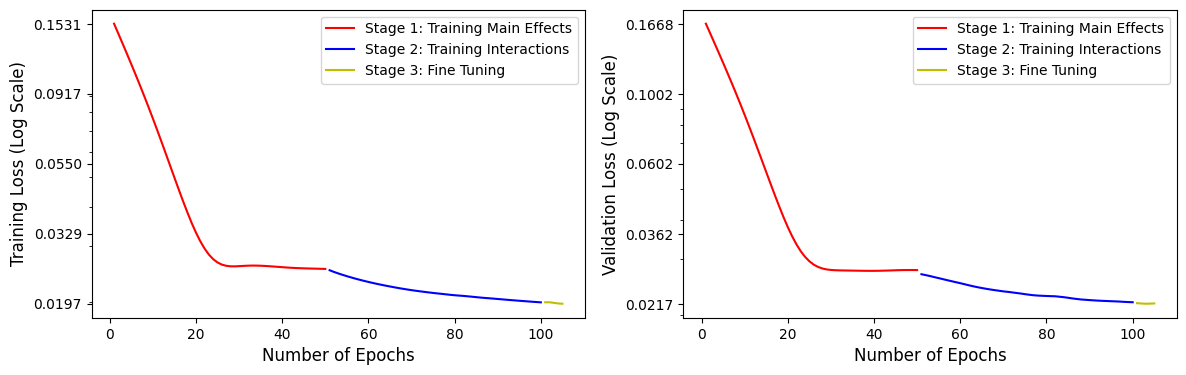

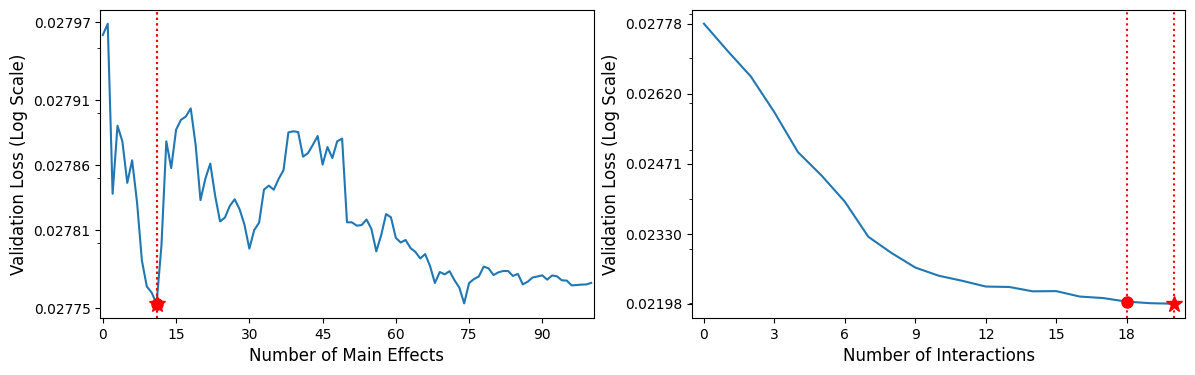

In [5]:
simu_dir = "./results/"
if not os.path.exists(simu_dir):
    os.makedirs(simu_dir)

data_dict_logs = model.summary_logs(save_dict=False)
plot_trajectory(data_dict_logs, folder=simu_dir, name="s1_traj_plot", log_scale=True, save_png=False)
plot_regularization(data_dict_logs, folder=simu_dir, name="s1_regu_plot", log_scale=True, save_png=False)

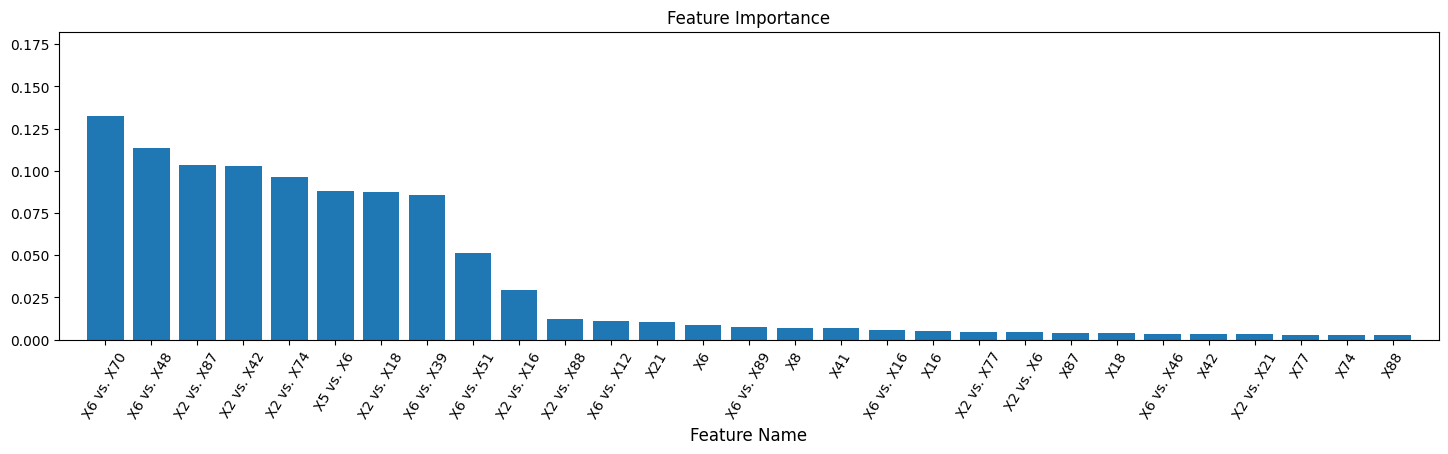

In [6]:
data_dict_global = model.global_explain(save_dict=False)
feature_importance_visualize(data_dict_global, save_png=True, folder=simu_dir, name='s1_feature')